In [3]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
# encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/tau2019/tau2019_encoder_data/tau_2019_conv_autoencoder_200_25.pkl")
encoder_df = pd.read_pickle("/work/aistwal/MMDS_MasterThesis/data/tau2019/tau2019_encoder_data/tau_2019_conv_autoencoder_50_10.pkl")

In [5]:
encoder_df

,Audio_Name,Label,Encoder Output
0,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,airport,"[979.00555, 1315.8931, 1674.273, 2150.1726, 97..."
1,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,bus,"[813.42163, 1309.7639, 1829.5267, 2345.505, 84..."
2,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,shopping_mall,"[1309.5095, 1663.2076, 2130.7615, 2628.9846, 1..."
3,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,street_pedestrian,"[1382.9443, 1703.7753, 2095.646, 2582.293, 143..."
4,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,street_pedestrian,"[1347.6736, 1669.3535, 2136.009, 2587.6548, 14..."
...,...,...,...
14395,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,tram,"[1617.7244, 2142.737, 2307.518, 2522.0857, 165..."
14396,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,tram,"[1557.2258, 2031.3154, 2378.7266, 2794.788, 15..."
14397,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,tram,"[746.95306, 1363.7922, 1751.8524, 2061.959, 86..."
14398,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,tram,"[1126.7748, 1709.415, 2173.319, 2466.2239, 110..."


In [6]:
encoder_df['Encoder Output'][0].size
# One encoded vector is of the size 40960

1600

In [7]:
labels = encoder_df["Label"]
np.unique(labels)

array(['airport', 'bus', 'metro', 'metro_station', 'park',
       'public_square', 'shopping_mall', 'street_pedestrian',
       'street_traffic', 'tram'], dtype=object)

In [8]:
# Convert DataFrame column with lists into a numpy matrix for t-SNE
data_matrix = np.stack(encoder_df['Encoder Output'].values)

In [9]:
data_matrix.shape

(14400, 1600)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(np.stack(encoder_df['Encoder Output'].values))

encoder_df['pca-one'] = pca_result[:,0]
encoder_df['pca-two'] = pca_result[:,1] 
encoder_df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.71205103 0.05505469 0.02465628]


In [11]:
# First component is capturing 70% of the variation

In [12]:
import seaborn as sns

In [13]:
encoder_df_subset = encoder_df
# encoder_df_subset = encoder_df.sample(frac=0.7)

<Axes: xlabel='pca-one', ylabel='pca-two'>

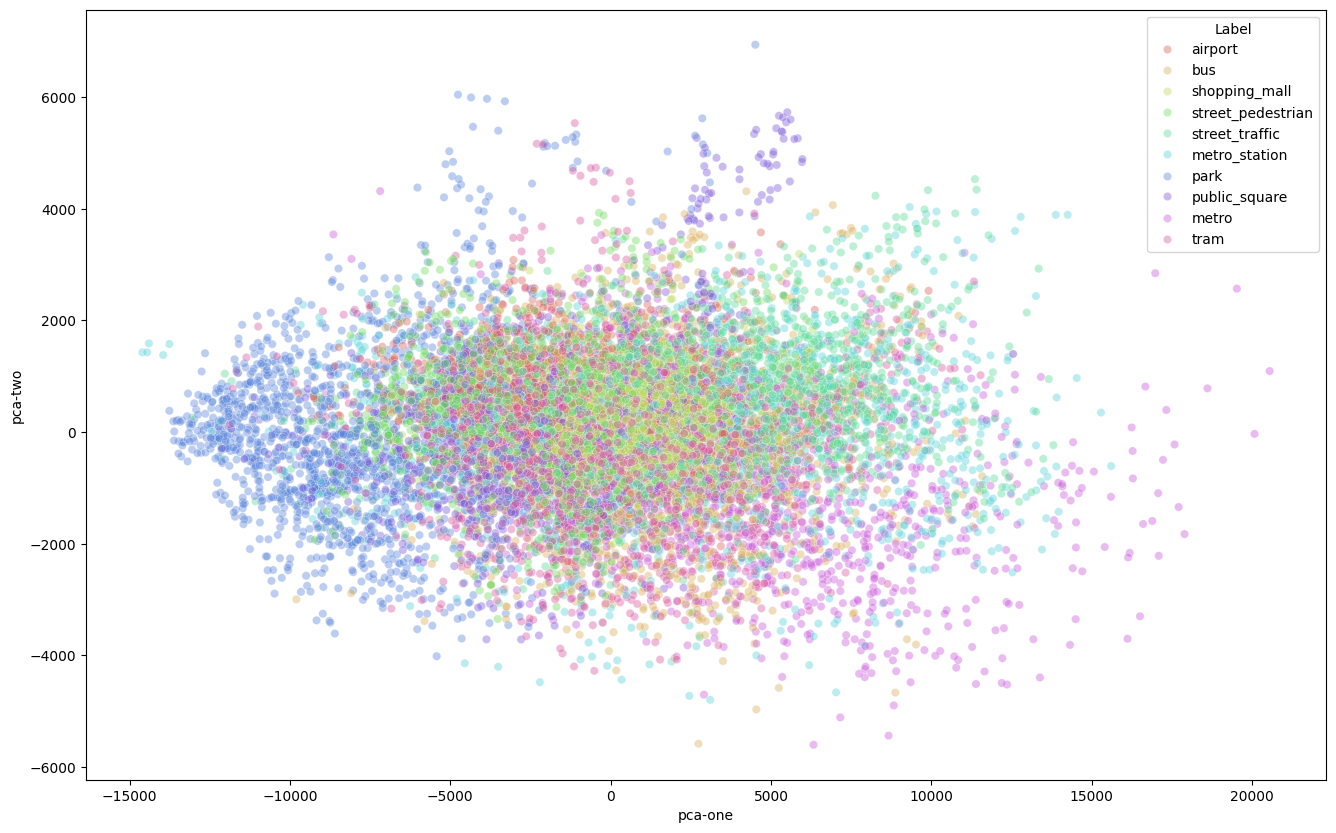

In [14]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data= encoder_df_subset,
    legend="full",
    alpha=0.4
)


#randomly sampling 50% of the data

In [15]:
import time

data_matrix = np.stack(encoder_df_subset['Encoder Output'].values)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_matrix)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14400 samples in 0.005s...
[t-SNE] Computed neighbors for 14400 samples in 1.929s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14400
[t-SNE] Computed conditional probabilities for sample 2000 / 14400
[t-SNE] Computed conditional probabilities for sample 3000 / 14400
[t-SNE] Computed conditional probabilities for sample 4000 / 14400
[t-SNE] Computed conditional probabilities for sample 5000 / 14400
[t-SNE] Computed conditional probabilities for sample 6000 / 14400
[t-SNE] Computed conditional probabilities for sample 7000 / 14400
[t-SNE] Computed conditional probabilities for sample 8000 / 14400
[t-SNE] Computed conditional probabilities for sample 9000 / 14400
[t-SNE] Computed conditional probabilities for sample 10000 / 14400
[t-SNE] Computed conditional probabilities for sample 11000 / 14400
[t-SNE] Computed conditional probabilities for sample 12000 / 14400
[t-SNE] Computed conditional probabilities for sa

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

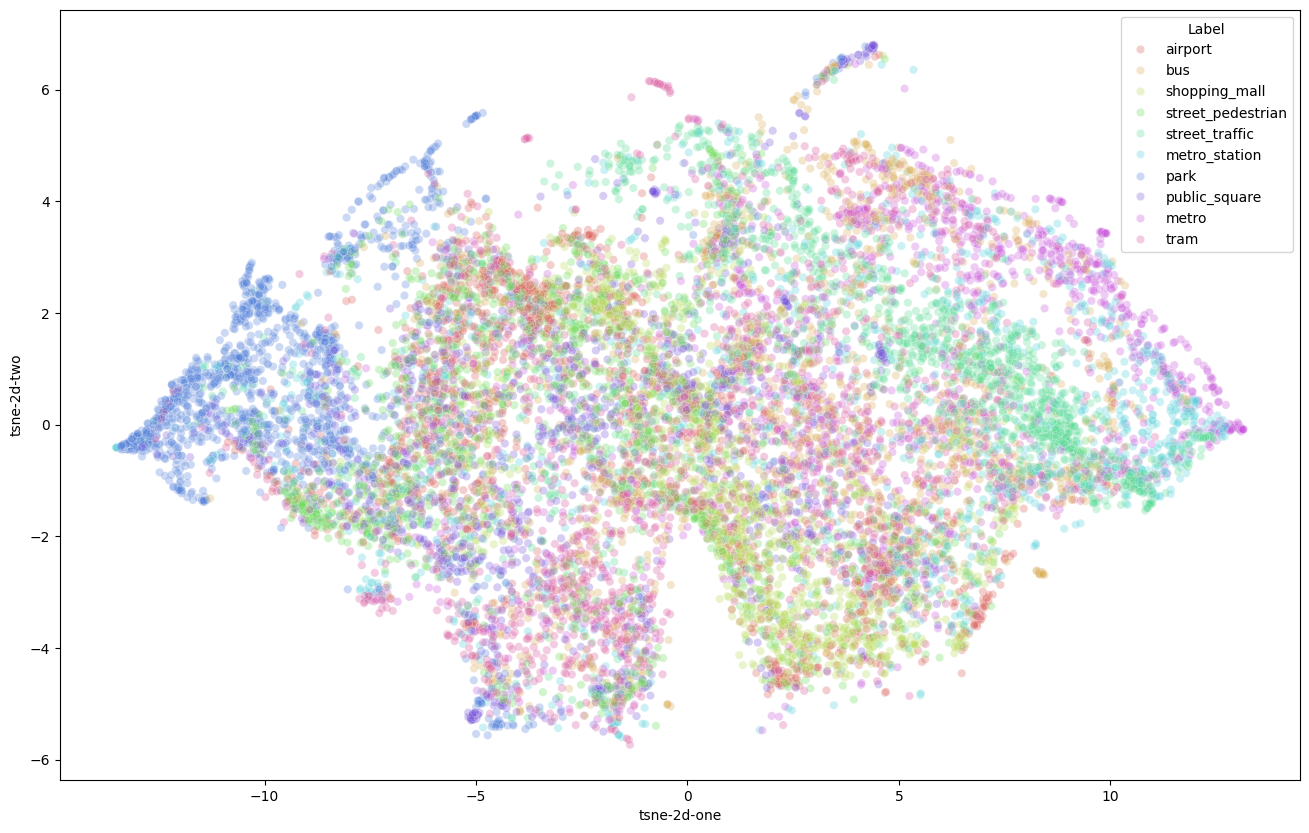

In [16]:
encoder_df_subset['tsne-2d-one'] = tsne_results[:,0]
encoder_df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3
)

In [17]:
encoder_df_subset.head()

,Audio_Name,Label,Encoder Output,pca-one,pca-two,pca-three,tsne-2d-one,tsne-2d-two
0,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,airport,"[979.00555, 1315.8931, 1674.273, 2150.1726, 97...",5843.057617,566.028992,174.267731,7.285445,-2.761945
1,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,bus,"[813.42163, 1309.7639, 1829.5267, 2345.505, 84...",5951.791016,-955.940674,346.132080,7.127471,0.615708
2,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,shopping_mall,"[1309.5095, 1663.2076, 2130.7615, 2628.9846, 1...",-1398.221802,-688.155762,129.731522,-1.970428,2.156246
3,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,street_pedestrian,"[1382.9443, 1703.7753, 2095.646, 2582.293, 143...",-3434.455811,261.652344,-1158.996582,-4.832608,0.661189
4,/work/aistwal/MMDS_MasterThesis/data/tau2019/t...,street_pedestrian,"[1347.6736, 1669.3535, 2136.009, 2587.6548, 14...",-3552.572754,315.628326,-245.459015,-5.254512,0.683049


In [18]:
#COMPARING PCA AND TSNE SIDE BY SIDE

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

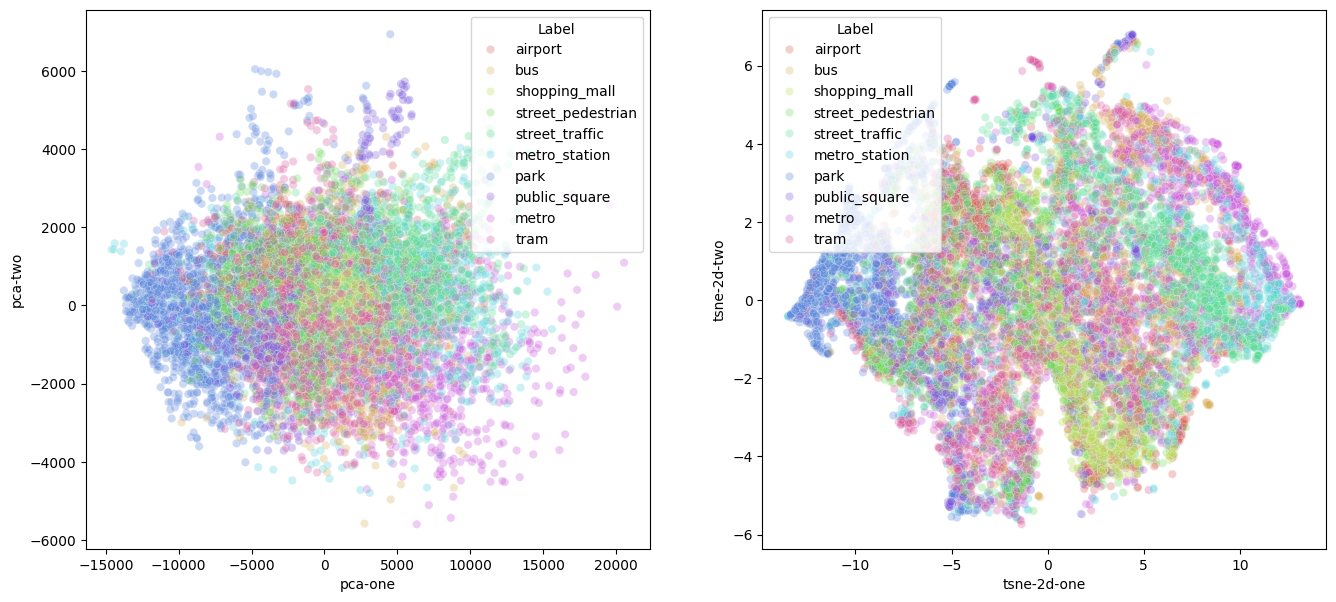

In [19]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [20]:
#now reduce the number of dimensions before feeding the data into the t-SNE algorithm. 
#Use PCA to reduce the dimensions to 50 then use that data for tsne
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_matrix)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9072901606559753


In [21]:
#The first 50 components hold around 90 percent of the total variation in the data.

In [22]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 11.228844165802002 seconds


<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

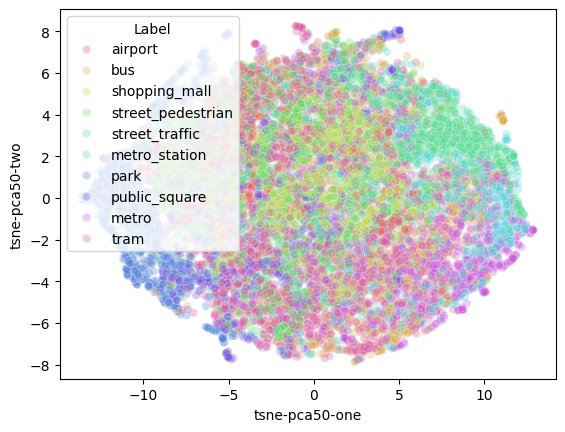

In [23]:
encoder_df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
encoder_df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="Label",
    palette=sns.color_palette("hls", 10),
    data=encoder_df_subset,
    legend="full",
    alpha=0.3
)

##??? how to make sense of this

In [24]:
encoder_df_subset.columns

Index(['Audio_Name', 'Label', 'Encoder Output', 'pca-one', 'pca-two',
       'pca-three', 'tsne-2d-one', 'tsne-2d-two', 'tsne-pca50-one',
       'tsne-pca50-two'],
      dtype='object')

In [25]:
#Perform tsne with 3 components
import time

data_matrix = np.stack(encoder_df_subset['Encoder Output'].values)

time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_matrix)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14400 samples in 0.005s...
[t-SNE] Computed neighbors for 14400 samples in 1.681s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14400
[t-SNE] Computed conditional probabilities for sample 2000 / 14400
[t-SNE] Computed conditional probabilities for sample 3000 / 14400
[t-SNE] Computed conditional probabilities for sample 4000 / 14400
[t-SNE] Computed conditional probabilities for sample 5000 / 14400
[t-SNE] Computed conditional probabilities for sample 6000 / 14400
[t-SNE] Computed conditional probabilities for sample 7000 / 14400
[t-SNE] Computed conditional probabilities for sample 8000 / 14400
[t-SNE] Computed conditional probabilities for sample 9000 / 14400
[t-SNE] Computed conditional probabilities for sample 10000 / 14400
[t-SNE] Computed conditional probabilities for sample 11000 / 14400
[t-SNE] Computed conditional probabilities for sample 12000 / 14400
[t-SNE] Computed conditional probabilities for sa

In [26]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(tsne_results)

encoder_df_subset['tsne-3d-one'] = tsne_results[:,0]
encoder_df_subset['tsne-3d-two'] = tsne_results[:,1]
encoder_df_subset['tsne-3d-three'] = tsne_results[:,2]
encoder_df_subset['cluster'] = clusters

In [ ]:
import plotly.express as px

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    encoder_df_subset,
    x='tsne-3d-one',
    y='tsne-3d-two',
    z='tsne-3d-three',
    color='Label',
    symbol='Label',# Ensure this column exists in your dataframe
    opacity=0.7  # Adjust opacity to ensure the plot is not too opaque
)

# Adjust layout for a tight fit in the output container
fig.update_layout(
    title='t-SNE Visualization of Embeddings with Labels',
    margin=dict(l=0, r=0, b=0, t=0),  # Minimize or remove margins
)

# Display the plot
fig.show()